# 4.10. Coding Etiquette & Excel Reporting

## This script contains:
#### 01. Importing Libraries
#### 02. Set path
#### 03. Importing data
#### 04. Checking data
#### 05. Addressing any PII (Personally Identifiable Information) data
#### 06. Creating a regional segmentation of the data
##### 6.1. Creating a regions
##### 6.2. Determining a difference in spending habits between the different U.S. regions
#### 07. Creating an exclusion flag for low-activity customers
#### 08. Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents
#### 09. Creating an appropriate visualization to show the distribution of profiles.
#### 10. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### 11. Comparing customer profiles with regions and departments
#### 12. Producing suitable charts to illustrate results and exporting them in a project folder
#### 13. Further analasys to answer other project questions
##### 13.1. The differences in ordering habits based on a customer's loyalty status
##### 13.2. The differences in ordering habits based on a customer's region
##### 13.3. Certain types of products that are more popular then others
#### 14. Tidying up the script, exporting final data set, and saving the notebook

## 01. Importing Libraries

In [1]:
# Importing Data

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Set path

In [2]:
# Set path

path = r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\4. Python Fundamentals for Data Analysts\05-05-2023 Instacart Basket Analysis'

In [3]:
# Check path

path

'C:\\Users\\Asus\\OneDrive\\Documents\\Data Analytics\\Data Immersion\\4. Python Fundamentals for Data Analysts\\05-05-2023 Instacart Basket Analysis'

## 03. Importing Data

In [4]:
# Import data

df_ords_prods_customs_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_charts.pkl'))

## 04. Checking Data

In [5]:
# Displaying the first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Order_frequency_flag,First_Name,Last_Name,Gender,STATE,Age,Date_joined,Number_of_dependants,Family_status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [6]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 34)

In [7]:
# Information about ords_prods_customs_all dataframe

df_ords_prods_customs_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Product_ID              int32   
 1   Product_name            object  
 2   Aisle_ID                int32   
 3   Department_ID           int32   
 4   Prices                  float64 
 5   Order_ID                int32   
 6   User_ID                 int32   
 7   Order_number            int8    
 8   Orders_day_of_Week      int8    
 9   Order_hour_of_Day       int8    
 10  Days_since_prior_order  float16 
 11  Add_to_cart_order       float16 
 12  Reordered               float16 
 13  _merge                  category
 14  merge_products          category
 15  Price_range_loc         object  
 16  Busiest_day             object  
 17  Busiest_days            object  
 18  Busiest_period_of_day   object  
 19  Max_order               int8    
 20  Loyalty_flag            object  
 21  Avg_Pr

## 05. Addressing any PII (Personally Identifiable Information) data

##### We have PII data such as First_Name and Last_Name of customers. Because these columns could potentially be traced back to a particular person I will remove them from the data set.

In [8]:
# Dropping PII columns

df_ords_prods_customs_all = df_ords_prods_customs_all.drop(columns = ['First_Name', 'Last_Name'])

In [9]:
# Checking the output

df_ords_prods_customs_all.columns

Index(['Product_ID', 'Product_name', 'Aisle_ID', 'Department_ID', 'Prices',
       'Order_ID', 'User_ID', 'Order_number', 'Orders_day_of_Week',
       'Order_hour_of_Day', 'Days_since_prior_order', 'Add_to_cart_order',
       'Reordered', '_merge', 'merge_products', 'Price_range_loc',
       'Busiest_day', 'Busiest_days', 'Busiest_period_of_day', 'Max_order',
       'Loyalty_flag', 'Avg_Price', 'Spending_flag', 'Median_frequency',
       'Order_frequency_flag', 'Gender', 'STATE', 'Age', 'Date_joined',
       'Number_of_dependants', 'Family_status', 'Income'],
      dtype='object')

In [10]:
# Checking the number of rows and columns

df_ords_prods_customs_all.shape

(32404859, 32)

## 06. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### 6.1. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [11]:
# Creating a an empty list in order to create a "Region" column 

region = []

In [12]:
# Checking the names of the States in df_ords_prods_customs_all

df_ords_prods_customs_all['STATE'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [13]:
# Filling the list with regions "Northeast", "Midwest", "South" and "West"

for value in df_ords_prods_customs_all['STATE']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [14]:
# Displaying the region list

region

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Mi

In [15]:
# Combining a new column "Region" with df_ords_prods_customs_all

df_ords_prods_customs_all['Region'] = region

In [16]:
# Checking the frequency distribution

df_ords_prods_customs_all['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

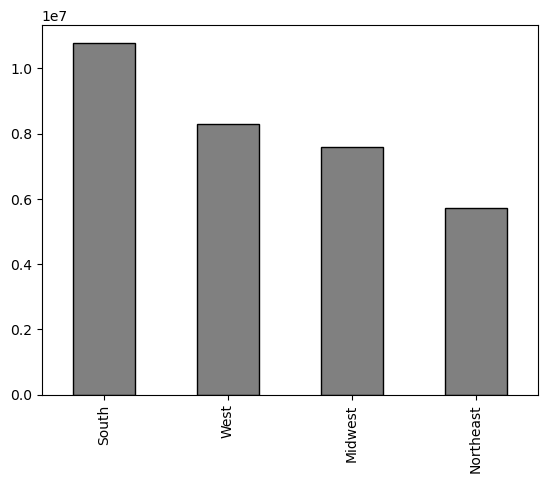

In [17]:
# Creating a bar chart

customer_by_region_bar = df_ords_prods_customs_all['Region'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [18]:
# Exporting the customer_by_region_bar

customer_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_br_region_bar.png'))

In [19]:
# Displaying the first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Median_frequency,Order_frequency_flag,Gender,STATE,Age,Date_joined,Number_of_dependants,Family_status,Income,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [20]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 33)

### 6.2. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [21]:
# Creating a crosstab between the "Region" and "Spending_flag"

crosstab_region_spending = pd.crosstab(df_ords_prods_customs_all['Region'], df_ords_prods_customs_all['Spending_flag'], dropna = False) 

In [22]:
# Checking the output

crosstab_region_spending

Spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


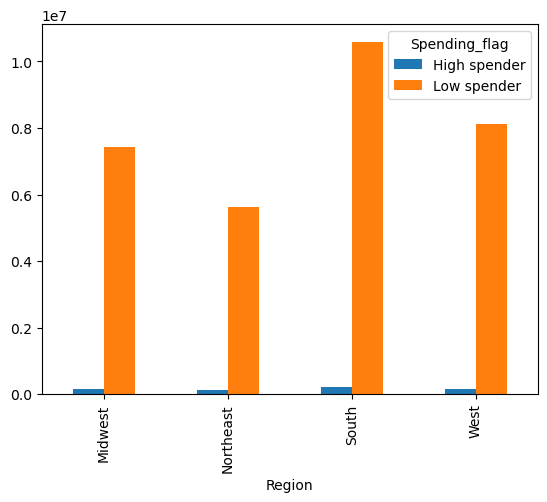

In [23]:
# Creating a stacked bar chart

region_spending_bar = crosstab_region_spending.plot.bar()

In [24]:
# Exporting the region_spending_bar

region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

## 07.	The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

#### Creating the exclusion flag

In [25]:
# Creating the exclusion flag


df_ords_prods_customs_all.loc[df_ords_prods_customs_all['Max_order'] < 5, 'Low_order_flag'] = 'Low-activity customer'

In [26]:
df_ords_prods_customs_all.loc[df_ords_prods_customs_all['Max_order'] >= 5, 'Low_order_flag'] = 'High-activity customer'

In [27]:
# Displaying the first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Order_frequency_flag,Gender,STATE,Age,Date_joined,Number_of_dependants,Family_status,Income,Region,Low_order_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer


In [28]:
# Checking the frequency distribution

df_ords_prods_customs_all['Low_order_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: Low_order_flag, dtype: int64

#### Creating a sample only with high-activity customers

In [29]:
# Creating a sample with only high-activity customers

df_high_activity_customers = df_ords_prods_customs_all[df_ords_prods_customs_all['Low_order_flag'] == 'High-activity customer']

In [30]:
# Exporting the sample for high_activity customers

df_high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_orders_products_customers_high_activity.pkl'))

In [31]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 34)

## 08. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Age

In [32]:
# Creating an Age_profile

df_ords_prods_customs_all.loc[df_ords_prods_customs_all['Age'] < 13, 'Age_profile'] = 'Child'


In [33]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age'] >= 13) & (df_ords_prods_customs_all['Age'] <= 17), 'Age_profile'] = 'Adolescent'


In [34]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age'] > 17) & (df_ords_prods_customs_all['Age'] <= 35), 'Age_profile'] = 'Young adult'

In [35]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age'] > 35) & (df_ords_prods_customs_all['Age'] <= 65), 'Age_profile'] = 'Adult'

In [36]:
df_ords_prods_customs_all.loc[df_ords_prods_customs_all['Age'] > 65, 'Age_profile'] = 'Older adult'

In [37]:
# Displaying first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Gender,STATE,Age,Date_joined,Number_of_dependants,Family_status,Income,Region,Low_order_flag,Age_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult


In [38]:
# Frequency distribution for Age_profile

df_ords_prods_customs_all['Age_profile'].value_counts(dropna = False)

Adult          15170339
Young adult     9146419
Older adult     8088101
Name: Age_profile, dtype: int64

In [39]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 35)

### Income

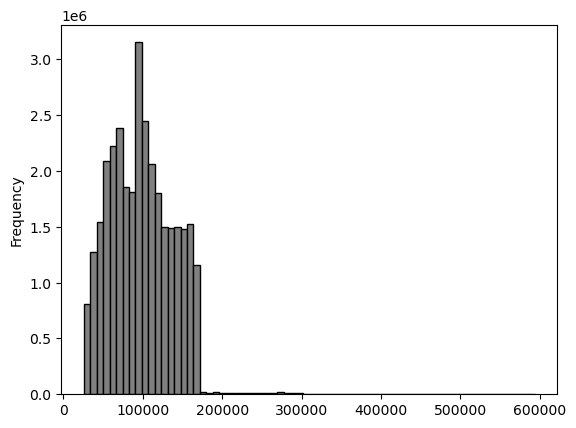

In [40]:
# Creating a histogram of customer income

hist_customer_income = df_ords_prods_customs_all['Income'].plot.hist(bins = 70, color = ['grey'], ec = 'black')

In [41]:
# Creating the Income_profile

df_ords_prods_customs_all.loc[df_ords_prods_customs_all['Income'] < 75000, 'Income_profile'] = 'Low-income'

In [42]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Income'] >= 75000) & (df_ords_prods_customs_all['Income'] < 125000), 'Income_profile'] = 'Middle-income'

In [43]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Income'] >= 125000) & (df_ords_prods_customs_all['Income'] < 175000), 'Income_profile'] = 'High-income'

In [44]:
df_ords_prods_customs_all.loc[df_ords_prods_customs_all['Income'] >= 175000, 'Income_profile'] = 'Very-high income'

In [45]:
# Displaying first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,STATE,Age,Date_joined,Number_of_dependants,Family_status,Income,Region,Low_order_flag,Age_profile,Income_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income


In [46]:
# Frequency distribution for Income_profile

df_ords_prods_customs_all['Income_profile'].value_counts(dropna = False)

Middle-income       13331136
Low-income          10442766
High-income          8323613
Very-high income      307344
Name: Income_profile, dtype: int64

In [47]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 36)

## Department

### Vegans and non-vegans
##### To be able to separate the customers into vegans and non-vegans I will use Department_ID column. 
##### Instead of labeling each purchase as vegan and non-vegan I will use crosstab to label customer based on their purchases (vegans don't eat meat/seafood and dairy/eggs which is contained in Department_ID=12 and Department_ID =16)

In [48]:
# Creating a crosstab between Department_ID and User_ID

dep_user_cross = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['User_ID'], dropna = False)

In [49]:
# Assigning nutrition flags to users and storing them in a Python dictionary

vegan_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:  # the index starts at 0, so index corresponds to Dep_ID=1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [50]:
# Assigning user flags to the vegan_flag

vegan_flag = []
for user in df_ords_prods_customs_all['User_ID']:
    vegan_flag.append(vegan_dict[user])

In [51]:
# Adding vegan_flag to df_ords_prods_customs_all as Vegan_profile

df_ords_prods_customs_all['Vegan_profile'] = vegan_flag

In [52]:
# Displaying first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Age,Date_joined,Number_of_dependants,Family_status,Income,Region,Low_order_flag,Age_profile,Income_profile,Vegan_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,81,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan


In [53]:
# Frequency distribution for Vegan_profile

df_ords_prods_customs_all['Vegan_profile'].value_counts(dropna = False)

Non-vegan    32021432
Vegan          383427
Name: Vegan_profile, dtype: int64

In [54]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 37)

### Pet owners and no-pet owners
#### I will use the Department_ID column (Department_ID = 8) to separate the customers into pet owners and no-pet owners.

In [55]:
# Assigning pet flags to users and storing it in a dictionary

pet_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[7] == 0:  # the index starts at 0, so index corresponds to Dep_ID=1
        pet_dict[user] = 'No-pet'
    else:
        pet_dict[user] = 'Pet owner'

In [56]:
# Assigning user flags to the pet_flag

pet_flag = []
for user in df_ords_prods_customs_all['User_ID']:
    pet_flag.append(pet_dict[user])

In [57]:
# Adding pet_flag to df_ords_prods_customs_all as Pet_profile

df_ords_prods_customs_all['Pet_profile'] = pet_flag

In [58]:
# Displaying first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Date_joined,Number_of_dependants,Family_status,Income,Region,Low_order_flag,Age_profile,Income_profile,Vegan_profile,Pet_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8/1/2019,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet


In [59]:
# Frequency distribution for Pet_profile

df_ords_prods_customs_all['Pet_profile'].value_counts(dropna = False)

No-pet       28876718
Pet owner     3528141
Name: Pet_profile, dtype: int64

In [60]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 38)

### Young parent (recently had a baby) and not young parent
#### I will use the Department_ID column (Department_ID = 18) to separate the customers into young parent and not young parent.

In [61]:
# Assigning young_parent flags to users and storing it in a dictionary

young_parent_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[17] == 0:  # the index starts at 0, so index corresponds to Dep_ID=1
        young_parent_dict[user] = 'Not-young parent'
    else:
        young_parent_dict[user] = 'Young parent'

In [62]:
# Assigning user flags to the young_parent_flag

young_parent_flag = []
for user in df_ords_prods_customs_all['User_ID']:
    young_parent_flag.append(young_parent_dict[user])

In [63]:
# Adding young_parent_flag to df_ords_prods_customs_all as Young_parent_profile

df_ords_prods_customs_all['Young_parent_profile'] = young_parent_flag

In [64]:
# Displaying first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Number_of_dependants,Family_status,Income,Region,Low_order_flag,Age_profile,Income_profile,Vegan_profile,Pet_profile,Young_parent_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,1,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent


In [65]:
# Frequency distribution for Young_parent_profile

df_ords_prods_customs_all['Young_parent_profile'].value_counts(dropna = False)

Not-young parent    22431550
Young parent         9973309
Name: Young_parent_profile, dtype: int64

In [66]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 39)

### Family status

In [67]:
# Frequency distribution for Family_status

df_ords_prods_customs_all['Family_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: Family_status, dtype: int64

In [68]:
# Creating a crosstab between Number_of_dependants and Family_status

family_crosstab = pd.crosstab(df_ords_prods_customs_all['Family_status'], df_ords_prods_customs_all['Number_of_dependants'], dropna = False)

In [69]:
# Check family_crosstab

family_crosstab

Number_of_dependants,0,1,2,3
Family_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


##### I will combine information in the following way:
##### (Family_status = married) and (Number_of_dependants = 1): Married, no children/dependants
##### (Family_status = married) and (Number_of_dependants >= 2): Married, with children/dependants
##### (Family_status in (single, divorced/widowed, living with parents and siblings)) and (Number_of_dependants == 0): Single, no children/dependants
##### (Family_status in (single, divorced/widowed, living with parents and siblings)) and (Number_of_dependants >= 1): Single, with children/dependants

In [70]:
# Creating the "Family_profile" column and labeling as written above

df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_status'] == 'married') & (df_ords_prods_customs_all['Number_of_dependants'] == 1), 'Family_profile'] = 'Married, no children/dependants'

In [71]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_status'] == 'married') & (df_ords_prods_customs_all['Number_of_dependants'] >= 2), 'Family_profile'] = 'Married, with children/dependants'

In [72]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_status'] != 'married') & (df_ords_prods_customs_all['Number_of_dependants'] == 0), 'Family_profile'] = 'Single, no children/dependants'

In [73]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_status'] != 'married') & (df_ords_prods_customs_all['Number_of_dependants'] >= 1), 'Family_profile'] = 'Single, with children/dependants'

In [74]:
# Displaying the first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Family_status,Income,Region,Low_order_flag,Age_profile,Income_profile,Vegan_profile,Pet_profile,Young_parent_profile,Family_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants"
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants"
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants"
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants"
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,married,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants"


In [75]:
# Frequency distribution for Family_profile

df_ords_prods_customs_all['Family_profile'].value_counts(dropna = False)

Married, with children/dependants    15205849
Single, no children/dependants        8097503
Married, no children/dependants       7550904
Single, with children/dependants      1550603
Name: Family_profile, dtype: int64

In [76]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 40)

### Shoppers behavior by orders day of week and age group

In [77]:
# Frequency distribution for Age_group

df_ords_prods_customs_all['Age_profile'].value_counts(dropna = False)

Adult          15170339
Young adult     9146419
Older adult     8088101
Name: Age_profile, dtype: int64

In [78]:
# Creating a crosstab between Age_profile and Orders_day_of_week

shoppers_dow_crosstab = pd.crosstab(df_ords_prods_customs_all['Age_profile'], df_ords_prods_customs_all['Orders_day_of_Week'], dropna = False)

In [79]:
# Check family_crosstab

shoppers_dow_crosstab

Orders_day_of_Week,0,1,2,3,4,5,6
Age_profile,,,,,,,
Adult,2899877,2644868,1981600,1799689,1772186,1967236,2104883
Older adult,1549208,1398511,1050844,963126,939259,1053087,1134066
Young adult,1755097,1616851,1181386,1077719,1072357,1185468,1257541


##### I will combine information in the following way:
##### (Age_profile = Adult) and (Orders_day_of_Week <= 1): Adult, weekend shopper
##### (Age_profile = Adult) and (Orders_day_of_Week > 1): Adult, working-day shopper
##### (Age_profile = Older adult) and (Orders_day_of_Week <= 1): Older adult, weekend shopper
##### (Age_profile = Older adult) and (Orders_day_of_Week > 1): Older adult dult, working-day shopper
##### (Age_profile = Young adult) and (Orders_day_of_Week <= 1): Young adult, weekend shopper
##### (Age_profile = Young adult) and (Orders_day_of_Week > 1): Young adult, working-day shopper

In [80]:
# Creating the "Shoppers_profile" column and labeling as written above

df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age_profile'] == 'Adult') & (df_ords_prods_customs_all['Orders_day_of_Week'] <= 1), 'Shoppers_profile'] = 'Adult, weekend shopper'

In [81]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age_profile'] == 'Adult') & (df_ords_prods_customs_all['Orders_day_of_Week'] > 1), 'Shoppers_profile'] = 'Adult, working-day shopper'

In [82]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age_profile'] == 'Older adult') & (df_ords_prods_customs_all['Orders_day_of_Week'] <= 1), 'Shoppers_profile'] = 'Older adult, weekend shopper'

In [83]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age_profile'] == 'Older adult') & (df_ords_prods_customs_all['Orders_day_of_Week'] > 1), 'Shoppers_profile'] = 'Older adult, working-day shopper'

In [84]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age_profile'] == 'Young adult') & (df_ords_prods_customs_all['Orders_day_of_Week'] <= 1), 'Shoppers_profile'] = 'Young adult, weekend shopper'

In [85]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Age_profile'] == 'Young adult') & (df_ords_prods_customs_all['Orders_day_of_Week'] > 1), 'Shoppers_profile'] = 'Young adult, working-day shopper'

In [86]:
# Displaying the first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Income,Region,Low_order_flag,Age_profile,Income_profile,Vegan_profile,Pet_profile,Young_parent_profile,Family_profile,Shoppers_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper"
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper"
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper"
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper"
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,49620,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper"


In [87]:
# Frequency distribution for Shoppers_profile

df_ords_prods_customs_all['Shoppers_profile'].value_counts(dropna = False)

Adult, working-day shopper          9625594
Young adult, working-day shopper    5774471
Adult, weekend shopper              5544745
Older adult, working-day shopper    5140382
Young adult, weekend shopper        3371948
Older adult, weekend shopper        2947719
Name: Shoppers_profile, dtype: int64

In [88]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 41)

### Shoppers behavior by orders day of week and family profile

In [89]:
# Creating a crosstab between Family_profile and Orders_day_of_week

shoppers_famprof_crosstab = pd.crosstab(df_ords_prods_customs_all['Family_profile'], df_ords_prods_customs_all['Orders_day_of_Week'], dropna = False)

In [90]:
# Check shoppers_famprof_crosstab

shoppers_famprof_crosstab

Orders_day_of_Week,0,1,2,3,4,5,6
Family_profile,,,,,,,
"Married, no children/dependants",1443764,1315991,977957,892921,886381,980588,1053302
"Married, with children/dependants",2914885,2648079,1985233,1805945,1771422,1964855,2115430
"Single, no children/dependants",1550309,1424767,1049129,959353,945205,1057145,1111595
"Single, with children/dependants",295224,271393,201511,182315,180794,203203,216163


##### I will combine information in the following way:
##### (Family_profile = Married, no children/dependants) and (Orders_day_of_Week <= 1): Married, no child/depnds, weekend shopper
##### (Family_profile_profile = Married, no children/dependants) and (Orders_day_of_Week > 1): Married, no child/depnds, working-day shopper
##### (Family_profile_profile = Married, with children/dependants) and (Orders_day_of_Week <= 1): Married, have child/depnds, weekend shopper
##### (Family_profile_profile = Married, with children/dependants) and (Orders_day_of_Week > 1): Married, have child/depnds, working-day shopper
##### (Family_profile_profile = Single, no children/dependants) and (Orders_day_of_Week <= 1): Single, no child/depnds, weekend shopper
##### (Family_profile_profile = Single, no children/dependants) and (Orders_day_of_Week > 1): Single, no child/depnds, working-day shopper
##### (Family_profile_profile = Single, with children/dependants) and (Orders_day_of_Week <= 1): Single, have child/depnds, weekend shopper
##### (Family_profile_profile = Single, with children/dependants) and (Orders_day_of_Week > 1): Single, have child/depnds, working-day shopper

In [91]:
# Creating the "Shoppers_fam_profile" column and labeling as written above

df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Married, no children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] <= 1), 'Shoppers_fam_profile'] = 'Married, no child/depnds, weekend shopper'

In [92]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Married, no children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] > 1), 'Shoppers_fam_profile'] = 'Married, no child/depnds, working-day shopper'

In [93]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Married, with children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] <= 1), 'Shoppers_fam_profile'] = 'Married, have child/depnds, weekend shopper'

In [94]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Married, with children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] > 1), 'Shoppers_fam_profile'] = 'Married, have child/depnds, working-day shopper'

In [95]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Single, no children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] <= 1), 'Shoppers_fam_profile'] = 'Single, no child/depnds, weekend shopper'

In [96]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Single, no children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] > 1), 'Shoppers_fam_profile'] = 'Single, no child/depnds, working_day shopper'

In [97]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Single, with children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] <= 1), 'Shoppers_fam_profile'] = 'Single, have child/depnds, weekend shopper'

In [98]:
df_ords_prods_customs_all.loc[(df_ords_prods_customs_all['Family_profile'] == 'Single, with children/dependants') & (df_ords_prods_customs_all['Orders_day_of_Week'] > 1), 'Shoppers_fam_profile'] = 'Single, have child/depnds, working-day shopper'

In [99]:
# Displaying the first 5 rows of df_ords_prods_customs_all

df_ords_prods_customs_all.head()

,Product_ID,Product_name,Aisle_ID,Department_ID,Prices,Order_ID,User_ID,Order_number,Orders_day_of_Week,Order_hour_of_Day,...,Region,Low_order_flag,Age_profile,Income_profile,Vegan_profile,Pet_profile,Young_parent_profile,Family_profile,Shoppers_profile,Shoppers_fam_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper","Married, no child/depnds, working-day shopper"
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper","Married, no child/depnds, working-day shopper"
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper","Married, no child/depnds, working-day shopper"
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper","Married, no child/depnds, working-day shopper"
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Midwest,High-activity customer,Older adult,Low-income,Non-vegan,No-pet,Not-young parent,"Married, no children/dependants","Older adult, working-day shopper","Married, no child/depnds, working-day shopper"


In [100]:
# Frequency distribution for Shoppers_fam_profile

df_ords_prods_customs_all['Shoppers_fam_profile'].value_counts(dropna = False)

Married, have child/depnds, working-day shopper    9642885
Married, have child/depnds, weekend shopper        5562964
Single, no child/depnds, working_day shopper       5122427
Married, no child/depnds, working-day shopper      4791149
Single, no child/depnds, weekend shopper           2975076
Married, no child/depnds, weekend shopper          2759755
Single, have child/depnds, working-day shopper      983986
Single, have child/depnds, weekend shopper          566617
Name: Shoppers_fam_profile, dtype: int64

In [101]:
# Dimension of df_ords_prods_customs_all

df_ords_prods_customs_all.shape

(32404859, 42)

## 09. Creating an appropriate visualization to show the distribution of profiles.

### Age 

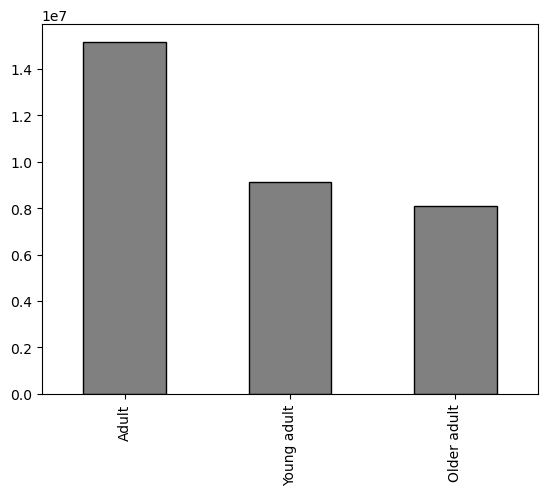

In [102]:
# Age_profile

age_profile_bar = df_ords_prods_customs_all['Age_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [103]:
# Exporting the Age_profile_bar

age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

### Income

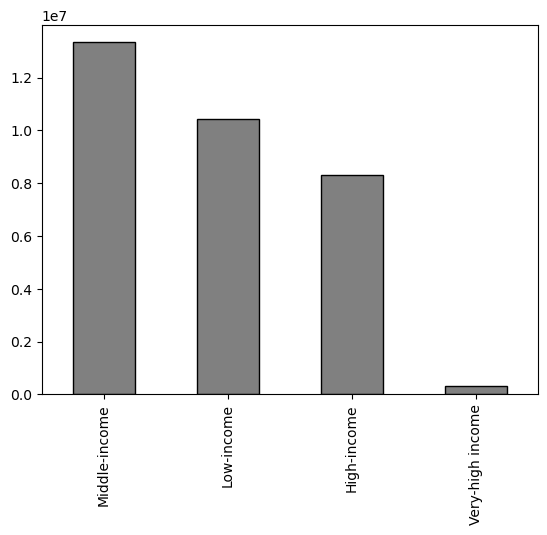

In [104]:
# Income_profile

income_profile_bar = df_ords_prods_customs_all['Income_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [105]:
# Exporting the Income_profile_bar

income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

## Department

### Vegans and non-vegans

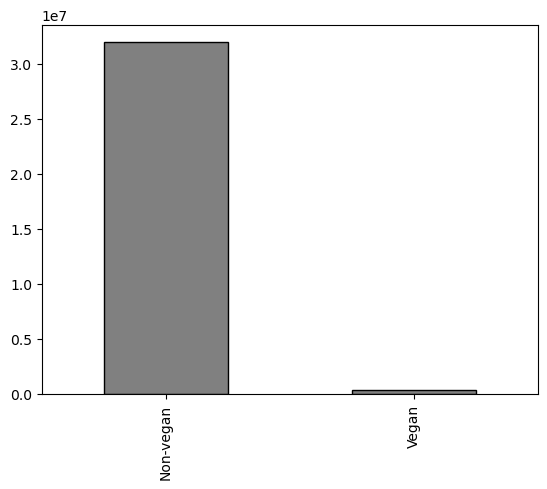

In [106]:
# Vegan_profile

vegan_profile_bar = df_ords_prods_customs_all['Vegan_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [107]:
# Exporting the Vegan_profile_bar

vegan_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_profile_bar.png'))

### Pet owners and no-pet owners

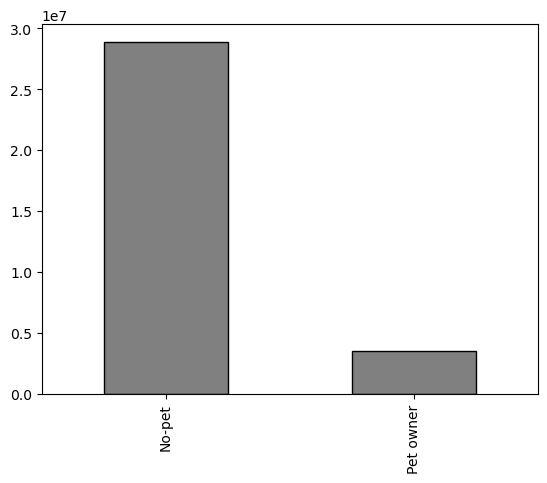

In [108]:
# Pet_profile

pet_profile_bar = df_ords_prods_customs_all['Pet_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [109]:
# Exporting the Pet_profile_bar

pet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile_bar.png'))

### Young parent (recently had a baby) and not young parent

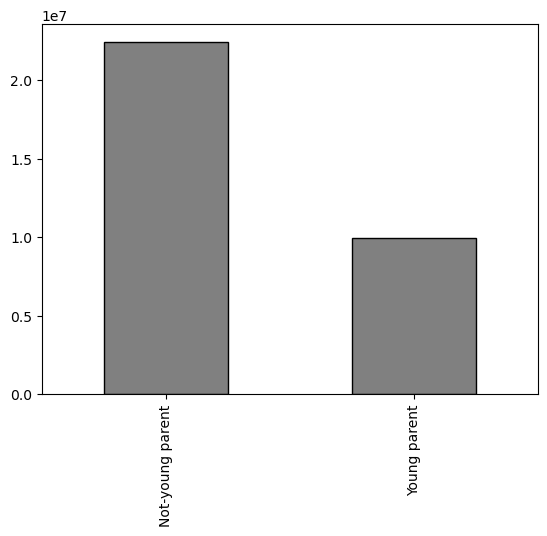

In [110]:
# Young_parent_profile

young_parent_profile_bar = df_ords_prods_customs_all['Young_parent_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [111]:
# Exporting the Young_parent_profile_bar

young_parent_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'young_parent_profile_bar.png'))

### Family status

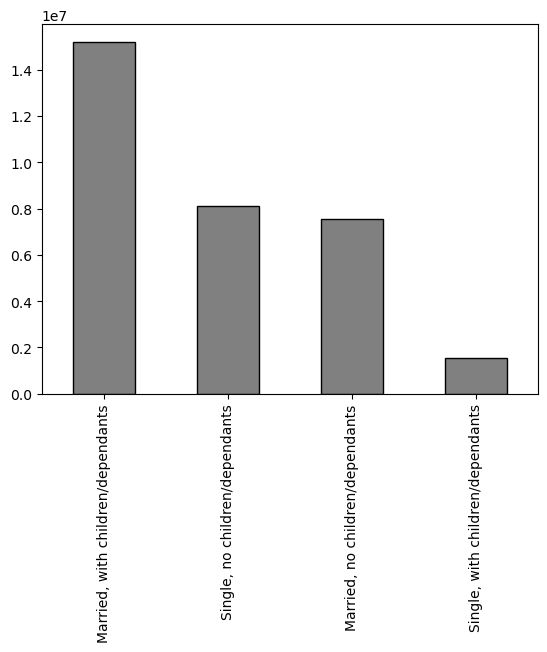

In [112]:
# Family_profile

family_profile_bar = df_ords_prods_customs_all['Family_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [113]:
# Exporting the Family_profile_bar

family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

### Shoppers behavior by orders of day and age group

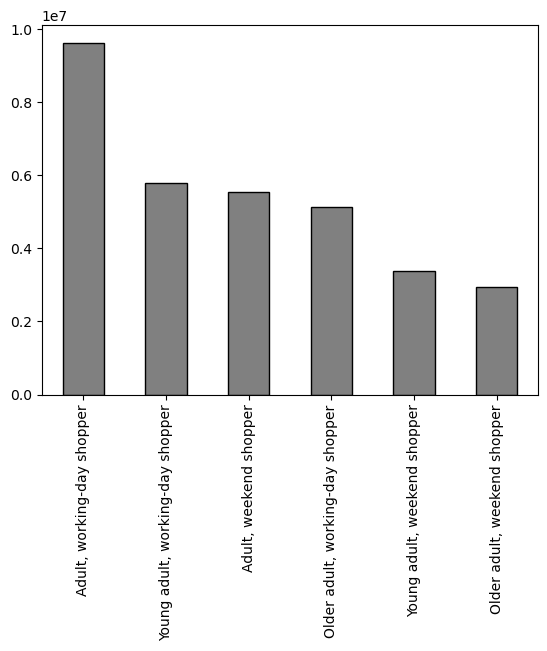

In [114]:
# Shoppers_profile

shoppers_profile_bar = df_ords_prods_customs_all['Shoppers_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [115]:
# Exporting the Shoppers_profile_bar

shoppers_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shoppers_profile_bar.png'))

### Shoppers behavior by orders day of week and family profile

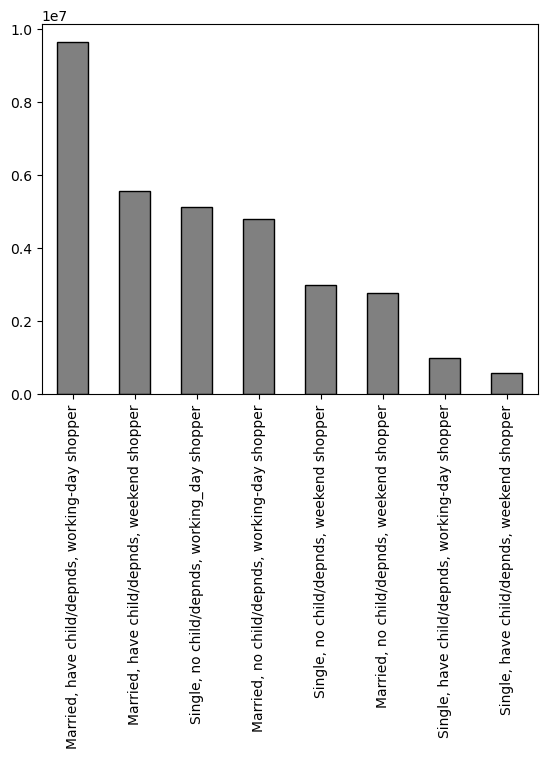

In [116]:
# Shoppers_fam_profile

shoppers_fam_profile_bar = df_ords_prods_customs_all['Shoppers_fam_profile'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [117]:
# Exporting the Shoppers_fam_profile_bar

shoppers_fam_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shoppers_fam_profile_bar.png'))

## 10. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Age

In [118]:
# I've changed the "Age" data type from "int32" to "int64" because I got an error message that mean can't be calculated. I had problems with my RAM, so in a meantime I bought new RAM and upgraded my laptop. 
 
df_ords_prods_customs_all['Age'] = df_ords_prods_customs_all['Age'].astype('int64')

In [119]:
# Age_profile stats

df_ords_prods_customs_all.groupby('Age_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order                  Prices                
                               min       mean   max    min      mean   max
Age_profile                                                               
Adult                          0.0  11.103899  30.0    1.0  7.792799  25.0
Older adult                    0.0  11.080923  30.0    1.0  7.794295  25.0
Young adult                    0.0  11.124858  30.0    1.0  7.785081  25.0

#### Usage frequency and expenditure are similar across all age groups.

### Income

In [120]:
# Income_profile stats

df_ords_prods_customs_all.groupby('Income_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order                  Prices            \
                                    min       mean   max    min      mean   
Income_profile                                                              
High-income                         0.0  11.053443  30.0    1.0  7.963271   
Low-income                          0.0  11.240514  30.0    1.0  7.434729   
Middle-income                       0.0  11.049451  30.0    1.0  7.962545   
Very-high income                    0.0  10.241647  30.0    1.0  7.790316   

                        
                   max  
Income_profile          
High-income       25.0  
Low-income        25.0  
Middle-income     25.0  
Very-high income  25.0

#### Usage frequency and expenditure are similar across all income groups although customers with very-high income tend to shop little more frequently than other customers as expected.

## Department

### Vegans and non-vegans

In [121]:
# Vegan_profile stats

df_ords_prods_customs_all.groupby('Vegan_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order                  Prices                
                                 min       mean   max    min      mean   max
Vegan_profile                                                               
Non-vegan                        0.0  11.063329  30.0    1.0  7.800348  25.0
Vegan                            0.0  14.749274  30.0    1.0  7.009920  20.0

#### Usage frequency and expenditure are not so similar across all vegan profile groups. Non-vegan tend to shop more frequently compared to vegan customers.

### Pet owners and no-pet owners

In [122]:
# Pet_profile stats

df_ords_prods_customs_all.groupby('Pet_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order                  Prices                
                               min       mean   max    min      mean   max
Pet_profile                                                               
No-pet                         0.0  11.200417  30.0    1.0  7.788360  25.0
Pet owner                      0.0  10.327303  30.0    1.0  7.812556  25.0

#### Usage frequency and expenditure are similar across pet profile groups. Pet owners tend to shop more frequently compared to no-pet owners as expected.

### Young parent (recently had a baby) and not young parent

In [123]:
# Young_parent_profile stats

df_ords_prods_customs_all.groupby('Young_parent_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order                  Prices            \
                                        min       mean   max    min      mean   
Young_parent_profile                                                            
Not-young parent                        0.0  11.848432  30.0    1.0  7.772306   
Young parent                            0.0   9.479345  30.0    1.0  7.833025   

                            
                       max  
Young_parent_profile        
Not-young parent      25.0  
Young parent          25.0

#### As expected usage frequency and expenditure are not so similar across young parent profile groups. Young parents tend to shop more frequently compared to not-young parents.

### Family status

In [124]:
# Family_profile stats

df_ords_prods_customs_all.groupby('Family_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order                   \
                                                     min       mean   max   
Family_profile                                                              
Married, no children/dependants                      0.0  11.113141  30.0   
Married, with children/dependants                    0.0  11.117681  30.0   
Single, no children/dependants                       0.0  11.080806  30.0   
Single, with children/dependants                     0.0  11.048170  30.0   

                                  Prices                  
                                     min      mean   max  
Family_profile                                            
Married, no children/dependants      1.0  7.795712  25.0  
Married, with children/dependants    1.0  7.788203  25.0  
Single, no children/dependants       1.0  7.789975  25.0  
Single, with children/dependants     1.0  7.800712  25.0

#### Usage frequency and expenditure are similar across all groups.

### Shoppers behavior by orders day of week age group

In [125]:
# Shoppers_profile stats

df_ords_prods_customs_all.groupby('Shoppers_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order                   \
                                                    min       mean   max   
Shoppers_profile                                                           
Adult, weekend shopper                              0.0  11.444839  30.0   
Adult, working-day shopper                          0.0  10.908153  30.0   
Older adult, weekend shopper                        0.0  11.465755  30.0   
Older adult, working-day shopper                    0.0  10.860785  30.0   
Young adult, weekend shopper                        0.0  11.492431  30.0   
Young adult, working-day shopper                    0.0  10.910890  30.0   

                                 Prices                  
                                    min      mean   max  
Shoppers_profile                                         
Adult, weekend shopper              1.0  7.812940  25.0  
Adult, working-day shopper          1.0  7.781197  25.0  
Older adult, weekend shopper        1.0  7.812365  25.0  
Older adult, working-day shopper    1.0  7.783933  25.0  
Young adult, weekend shopper        1.0  7.806222  25.0  
Young adult, working-day shopper    1.0  7.772736  25.0

#### Usage frequency and expenditure are similar across all groups, although older adult who is working-day shopper tend to shop more frequently compared to other age group shoppers.

### Shoppers behavior by orders day of week and family profile

In [126]:
# Shoppers_fam_profile stats

df_ords_prods_customs_all.groupby('Shoppers_fam_profile').agg({'Days_since_prior_order': ['min', 'mean', 'max'], 'Prices': ['min', 'mean', 'max']})

Days_since_prior_order  \
                                                                   min   
Shoppers_fam_profile                                                     
Married, have child/depnds, weekend shopper                        0.0   
Married, have child/depnds, working-day shopper                    0.0   
Married, no child/depnds, weekend shopper                          0.0   
Married, no child/depnds, working-day shopper                      0.0   
Single, have child/depnds, weekend shopper                         0.0   
Single, have child/depnds, working-day shopper                     0.0   
Single, no child/depnds, weekend shopper                           0.0   
Single, no child/depnds, working_day shopper                       0.0   

                                                                 Prices  \
                                                      mean   max    min   
Shoppers_fam_profile                                                      
Married, have child/depnds, weekend shopper      11.462414  30.0    1.0   
Married, have child/depnds, working-day shopper  10.919521  30.0    1.0   
Married, no child/depnds, weekend shopper        11.479972  30.0    1.0   
Married, no child/depnds, working-day shopper    10.902367  30.0    1.0   
Single, have child/depnds, weekend shopper       11.484070  30.0    1.0   
Single, have child/depnds, working-day shopper   10.797623  30.0    1.0   
Single, no child/depnds, weekend shopper         11.446581  30.0    1.0   
Single, no child/depnds, working_day shopper     10.868951  30.0    1.0   

                                                                 
                                                     mean   max  
Shoppers_fam_profile                                             
Married, have child/depnds, weekend shopper      7.809679  25.0  
Married, have child/depnds, working-day shopper  7.775814  25.0  
Married, no child/depnds, weekend shopper        7.813851  25.0  
Married, no child/depnds, working-day shopper    7.785263  25.0  
Single, have child/depnds, weekend shopper       7.822380  25.0  
Single, have child/depnds, working-day shopper   7.788235  25.0  
Single, no child/depnds, weekend shopper         7.808212  25.0  
Single, no child/depnds, working_day shopper     7.779382  25.0

#### Usage frequency and expenditure are similar across all groups, although single customer with no child/depends who is a weekend shopper tend to shop more frequently compared to other family profile group shoppers.

##  11.	Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Customer profiles by Region

#### Age

In [127]:
# Creating a crosstab comparing "Age_profile" and "Region", and looking at percentages for better comparibility

age_region_cross = pd.crosstab(df_ords_prods_customs_all['Age_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [128]:
# Check age_region_cross

age_region_cross

Region,Midwest,Northeast,South,West
Age_profile,,,,
Adult,0.473976,0.461402,0.466592,0.469497
Older adult,0.247671,0.254940,0.247354,0.250586
Young adult,0.278353,0.283659,0.286054,0.279916


##### The age groups rates are similarly big across different regions.

#### Income

In [129]:
# Creating a crosstab comparing "Income_profile" and "Region", and looking at percentages for better comparibility

income_region_cross = pd.crosstab(df_ords_prods_customs_all['Income_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [130]:
# Check income_region_cross

income_region_cross

Region,Midwest,Northeast,South,West
Income_profile,,,,
High-income,0.260164,0.260477,0.253280,0.256008
Low-income,0.319571,0.318405,0.323667,0.325550
Middle-income,0.410111,0.412618,0.413510,0.408968
Very-high income,0.010154,0.008500,0.009544,0.009473


##### The income group rates are similarly big across different regions. 

### Department

#### Vegans and non-vegans

In [131]:
# Creating a crosstab comparing "Vegan_profile" and "Region", and looking at percentages for better comparibility

vegan_region_cross = pd.crosstab(df_ords_prods_customs_all['Vegan_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [132]:
# Check vegan_region_cross

vegan_region_cross

Region,Midwest,Northeast,South,West
Vegan_profile,,,,
Non-vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


##### The vegan and non-vegan rates are similarly big across different regions.

#### Pet owners and no-pet owners

In [133]:
# Creating a crosstab comparing "Pet_profile" and "Region", and looking at percentages for better comparibility

pet_region_cross = pd.crosstab(df_ords_prods_customs_all['Pet_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [134]:
# Check pet_region_cross

pet_region_cross

Region,Midwest,Northeast,South,West
Pet_profile,,,,
No-pet,0.888836,0.892981,0.894204,0.887927
Pet owner,0.111164,0.107019,0.105796,0.112073


##### The pet owners and no-pet owners rates are similarly big across different regions.

#### Young parent (recently had a baby) and not young parent

In [135]:
# Creating a crosstab comparing "Young_parent_profile" and "Region", and looking at percentages for better comparibility

youngparent_region_cross = pd.crosstab(df_ords_prods_customs_all['Young_parent_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [136]:
# Check youngparent_region_cross

youngparent_region_cross

Region,Midwest,Northeast,South,West
Young_parent_profile,,,,
Not-young parent,0.691802,0.689273,0.692069,0.694864
Young parent,0.308198,0.310727,0.307931,0.305136


##### The young parent and not-young parent rates are similarly big across different regions.

#### Family status

In [137]:
# Creating a crosstab comparing "Family_profile" and "Region", and looking at percentages for better comparibility

family_region_cross = pd.crosstab(df_ords_prods_customs_all['Family_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [138]:
# Check family_region_cross

family_region_cross

Region,Midwest,Northeast,South,West
Family_profile,,,,
"Married, no children/dependants",0.236932,0.236116,0.229883,0.231373
"Married, with children/dependants",0.464053,0.469197,0.470703,0.472141
"Single, no children/dependants",0.250772,0.247836,0.250342,0.249893
"Single, with children/dependants",0.048243,0.046851,0.049072,0.046593


##### The rates of different family profiles are similarly big across different regions.

#### Shoppers behavior by orders day of week and age group

In [139]:
# Creating a crosstab comparing "Shoppers_profile" and "Region", and looking at percentages for better comparibility

shoppers_dowage_region_cross = pd.crosstab(df_ords_prods_customs_all['Shoppers_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [140]:
# Check shoppers_dowage_region_cross

shoppers_dowage_region_cross

Region,Midwest,Northeast,South,West
Shoppers_profile,,,,
"Adult, weekend shopper",0.173465,0.169157,0.169811,0.171984
"Adult, working-day shopper",0.300511,0.292245,0.296780,0.297514
"Older adult, weekend shopper",0.089239,0.092665,0.090880,0.091485
"Older adult, working-day shopper",0.158432,0.162274,0.156474,0.159102
"Young adult, weekend shopper",0.103339,0.104648,0.104845,0.103281
"Young adult, working-day shopper",0.175014,0.179011,0.181209,0.176635


##### The rates of different shoppers profiles are similarly big across different regions.

#### Shoppers behavior by orders day of week and family profile

In [141]:
# Creating a crosstab comparing "Shoppers_fam_profile" and "Region", and looking at percentages for better comparibility

shoppersfam_region_cross = pd.crosstab(df_ords_prods_customs_all['Shoppers_fam_profile'], df_ords_prods_customs_all['Region'], dropna = False, normalize = 'columns')

In [142]:
# Check shoppersfam_region_cross

shoppersfam_region_cross

Region,Midwest,Northeast,South,West
Shoppers_fam_profile,,,,
"Married, have child/depnds, weekend shopper",0.169831,0.171961,0.172038,0.172678
"Married, have child/depnds, working-day shopper",0.294222,0.297236,0.298665,0.299464
"Married, no child/depnds, weekend shopper",0.086189,0.086484,0.083858,0.085017
"Married, no child/depnds, working-day shopper",0.150743,0.149632,0.146025,0.146356
"Single, have child/depnds, weekend shopper",0.017886,0.017248,0.017582,0.017157
"Single, have child/depnds, working-day shopper",0.030357,0.029602,0.031491,0.029436
"Single, no child/depnds, weekend shopper",0.092137,0.090776,0.092059,0.091898
"Single, no child/depnds, working_day shopper",0.158636,0.157060,0.158282,0.157995


##### The rates of different shoppers family profiles are similarly big across different regions.

### Customer profiles by Department

#### Age

In [143]:
# Creating a crosstab comparing "Age_profile" and "Department_ID", and looking at percentages for better comparibility

age_department_cross = pd.crosstab(df_ords_prods_customs_all['Age_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [144]:
# Check all columns for age_department_cross

pd.set_option('display.max_columns', None)

In [145]:
age_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Age_profile,,,,,,,,,,,,,,,,,,,,,
Adult,0.068918,0.001126,0.036210,0.292830,0.004734,0.008304,0.083229,0.002974,0.026688,0.001057,0.013965,0.021792,0.057865,0.021677,0.032884,0.166044,0.022792,0.013393,0.088975,0.032427,0.002116
Older adult,0.069277,0.001088,0.036006,0.292815,0.004568,0.008236,0.083489,0.003076,0.026757,0.001064,0.013675,0.022163,0.057914,0.021460,0.032890,0.166391,0.023001,0.012763,0.088852,0.032411,0.002104
Young adult,0.068762,0.001138,0.036285,0.291769,0.004912,0.008381,0.082025,0.003031,0.026825,0.001085,0.013680,0.021765,0.057850,0.021933,0.033147,0.167717,0.022617,0.012836,0.089558,0.032492,0.002190


##### Different age groups buy products from different departments at similar rates.

#### Income

In [146]:
# Creating a crosstab comparing "Income_profile" and "Department_ID", and looking at percentages for better comparibility

income_department_cross = pd.crosstab(df_ords_prods_customs_all['Income_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [147]:
# Check all columns for income_department_cross

pd.set_option('display.max_columns', None)

In [148]:
income_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Income_profile,,,,,,,,,,,,,,,,,,,,,
High-income,0.069882,0.001099,0.036904,0.299802,0.004501,0.008528,0.079127,0.003047,0.027711,0.000996,0.013730,0.023688,0.059219,0.020891,0.034467,0.168986,0.022128,0.013785,0.076821,0.032517,0.002172
Low-income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,0.013988,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Middle-income,0.069535,0.001122,0.036725,0.300369,0.004532,0.008610,0.078201,0.003031,0.027914,0.001042,0.013684,0.023719,0.059001,0.020675,0.034155,0.169392,0.022112,0.014033,0.077375,0.032656,0.002116
Very-high income,0.078206,0.001806,0.049889,0.195582,0.024829,0.007975,0.094220,0.007278,0.027113,0.000094,0.015566,0.024956,0.063099,0.025141,0.035914,0.175416,0.044556,0.007968,0.089984,0.029085,0.001324


##### 1 - frozen; 2 - other: 3 - bakery; 4 - produce; 5 - alcohol; 6 - international; 7 - beverages; 8 - pets; 9 - dry goods pasta; 10 - bulk; 11 - personal care; 12 - meat/seafood; 13 - pantry; 14 - breakfast; 15 - canned goods; 16 - dairy/eggs; 17 - household; 18 - babies; 19 - snacks; 20 - deli; 21 - missing
##### In most of departments are some differences, especially between the Very-high income group and the other 3 groups in the form of their spending. As expected the very-high income group spends more money than other groups, except for the departments "produce" (4), "pets" (8), "dry goods pasta" (9), "babies" (18), "deli" (20) and "missing" (21).
##### Low-income group spends less money, compared to high and middle income groups, on "produce (4), "international" (6), pets (8), meat/seafood (12), but at he same time more money on "beverages" (7), household (17) and "snacks" (19).
##### High-income group spends less money, compared to other Low and Middle income groups, on "other" (2), alcohol (5), bulk (10) and "snacks" (19).

## Department

#### Vegans and non-vegans

In [149]:
# Creating a crosstab comparing "Vegan_profile" and "Department_ID", and looking at percentages for better comparibility

vegan_department_cross = pd.crosstab(df_ords_prods_customs_all['Vegan_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [150]:
# Check all columns for vegan_department_cross

pd.set_option('display.max_columns', None)

In [151]:
vegan_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,0.013644,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,0.027872,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


##### In most departments can be seen differences between Non-vegan and vegan groups. Vegans spend more money on "other" (2), "alcohol" (5), "beverages" (7), "personal care" (11), "houshold" (17) and "snacks" (19). They spend less on "frozen" (1), "bakery" (3), "international" (6), "dry good pasta" (9), "pantry" (13), "canned goods" (15), "babies" (18) and "deli" (20). They don't buy meat/seafood (12) and "dairy/eggs" as vegans don't eat that kind of food.

#### Pet owners and no-pet owners

In [152]:
# Creating a crosstab comparing "Pet_profile" and "Department_ID", and looking at percentages for better comparibility

pet_department_cross = pd.crosstab(df_ords_prods_customs_all['Pet_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [153]:
# Check all columns for pet_department_cross

pd.set_option('display.max_columns', None)

In [154]:
pet_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Pet_profile,,,,,,,,,,,,,,,,,,,,,
No-pet,0.067467,0.001073,0.035727,0.301132,0.004379,0.008229,0.081797,0.000000,0.026454,0.001123,0.012809,0.021731,0.057295,0.021716,0.032514,0.168440,0.020810,0.013420,0.089221,0.032534,0.002131
Pet owner,0.081209,0.001508,0.039890,0.222100,0.007724,0.008966,0.092426,0.027696,0.029118,0.000606,0.022023,0.023070,0.062607,0.021523,0.036612,0.151564,0.039044,0.010282,0.088190,0.031683,0.002160


##### In most departments can be seen differences between no-pet and pet owners. Pet owners spend more money on "frozen" (1), "bakery" (3), "alcohol" (5), "beverages" (7), "pets" (8), "personal care" (11), "pantry" (13), "canned goods" (15) and "household" (17). They spend less on "produce" (4), "bulk" (10) and"dairy/eggs" (16).

#### Young parent (recently had a baby) and not young parent

In [155]:
# Creating a crosstab comparing "Young_parent_profile" and "Department_ID", and looking at percentages for better comparibility

youngparent_department_cross = pd.crosstab(df_ords_prods_customs_all['Young_parent_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [156]:
# Check all columns for pet_department_cross

pd.set_option('display.max_columns', None)

In [157]:
youngparent_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Young_parent_profile,,,,,,,,,,,,,,,,,,,,,
Not-young parent,0.068806,0.001098,0.035709,0.296433,0.005890,0.008558,0.090355,0.003278,0.025397,0.001105,0.013617,0.022014,0.059774,0.021777,0.033144,0.162589,0.022839,0.000000,0.092390,0.033081,0.002146
Young parent,0.069316,0.001170,0.037241,0.283742,0.002162,0.007748,0.066309,0.002424,0.029772,0.000982,0.014250,0.021569,0.053597,0.021513,0.032546,0.175632,0.022696,0.042494,0.081729,0.031001,0.002106


##### In almost all the departments young parents spend less money compared to not-young parents. As expected young parents spend more money on "babies" (18) compared to not-young parents. And as well young parents spend much less money on "beverages" (7) and "pets" (8).

#### Family status

In [158]:
# Creating a crosstab comparing "Family_profile" and "Department_ID", and looking at percentages for better comparibility

family_department_cross = pd.crosstab(df_ords_prods_customs_all['Family_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [159]:
# Check all columns for family_department_cross

pd.set_option('display.max_columns', None)

In [160]:
family_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Family_profile,,,,,,,,,,,,,,,,,,,,,
"Married, no children/dependants",0.068501,0.001134,0.036290,0.292094,0.004674,0.008405,0.082844,0.002980,0.026714,0.001107,0.013833,0.022041,0.058145,0.021909,0.033025,0.167336,0.022995,0.012703,0.089014,0.032144,0.002111
"Married, with children/dependants",0.069171,0.001094,0.036029,0.292561,0.004629,0.008221,0.083094,0.002960,0.026828,0.001070,0.013798,0.021994,0.057826,0.021590,0.033057,0.166058,0.022954,0.013235,0.089272,0.032420,0.002140
"Single, no children/dependants",0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,0.013832,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110
"Single, with children/dependants",0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,0.013744,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303


##### In almost all the departments we can observe similar distributions. Single with children/dependants spend more money compared to other family profiles, on "other" (2), "alcohol" (5) and "pets" (8), while at the same time spend less on "beverages" (7).
##### Married, with children/dependants  spend less money, compared to other family profiles, on "international" (6).
##### Married, with no children/dependants spend more on "bulk" (10).

#### Shoppers behavior by orders day of week and age group

In [161]:
# Creating a crosstab comparing "Shoppers_profile" and "Department_ID", and looking at percentages for better comparibility

shoppersodow_department_cross = pd.crosstab(df_ords_prods_customs_all['Shoppers_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [162]:
# Check all columns for shoppersodow_department_cross

pd.set_option('display.max_columns', None)

In [163]:
shoppersodow_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Shoppers_profile,,,,,,,,,,,,,,,,,,,,,
"Adult, weekend shopper",0.067314,0.001010,0.036139,0.306902,0.003148,0.008647,0.077474,0.002617,0.027718,0.001040,0.013122,0.022674,0.055453,0.021295,0.034498,0.165638,0.020890,0.013318,0.085856,0.033197,0.002051
"Adult, working-day shopper",0.069842,0.001193,0.036252,0.284724,0.005648,0.008107,0.086545,0.003180,0.026095,0.001067,0.014450,0.021285,0.059255,0.021898,0.031954,0.166278,0.023888,0.013435,0.090771,0.031982,0.002153
"Older adult, weekend shopper",0.067935,0.000980,0.035779,0.307303,0.003211,0.008514,0.077431,0.002727,0.027837,0.001062,0.012742,0.023193,0.055305,0.021328,0.034025,0.166050,0.020844,0.012708,0.085970,0.032993,0.002065
"Older adult, working-day shopper",0.070046,0.001150,0.036137,0.284506,0.005347,0.008077,0.086963,0.003276,0.026137,0.001066,0.014209,0.021573,0.059411,0.021535,0.032240,0.166587,0.024239,0.012794,0.090504,0.032077,0.002127
"Young adult, weekend shopper",0.066976,0.001060,0.036294,0.305848,0.003297,0.008624,0.076292,0.002707,0.027954,0.001061,0.012600,0.022648,0.055293,0.021679,0.034572,0.167232,0.020828,0.012863,0.086562,0.033493,0.002118
"Young adult, working-day shopper",0.069805,0.001184,0.036281,0.283548,0.005855,0.008240,0.085373,0.003220,0.026165,0.001099,0.014311,0.021249,0.059343,0.022082,0.032315,0.168001,0.023661,0.012821,0.091308,0.031908,0.002232


##### In almost all the departments we can observe similar distributions. 
##### Adult, older adult and young adult (all weekend shoppers) tned to spend more money on "international" (6) and "canned goods" (15).
##### Adult, older adult and young adult (all working-day shoppers) tend to spend more money on "beverages" (7), "pets" (8), "personal care" (11) and "household" (17).

#### Shoppers behavior by orders day of week and family profile

In [164]:
# Creating a crosstab comparing "Shoppers_fam_profile" and "Department_ID", and looking at percentages for better comparibility

shoppersfam_department_cross = pd.crosstab(df_ords_prods_customs_all['Shoppers_fam_profile'], df_ords_prods_customs_all['Department_ID'], dropna = False, normalize = 'index')

In [165]:
# Check all columns for shoppersfam_department_cross
pd.set_option('display.max_columns', None)

In [166]:
shoppersfam_department_cross

Department_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Shoppers_fam_profile,,,,,,,,,,,,,,,,,,,,,
"Married, have child/depnds, weekend shopper",0.067525,0.000987,0.035977,0.306630,0.003177,0.008521,0.077191,0.002619,0.027811,0.001048,0.012806,0.023012,0.055191,0.021419,0.034492,0.165766,0.020985,0.013151,0.086395,0.033217,0.002078
"Married, have child/depnds, working-day shopper",0.070121,0.001156,0.036060,0.284445,0.005466,0.008047,0.086498,0.003157,0.026261,0.001082,0.014370,0.021406,0.059345,0.021689,0.032229,0.166227,0.024090,0.013283,0.090931,0.031960,0.002176
"Married, no child/depnds, weekend shopper",0.067006,0.001042,0.036265,0.306437,0.003116,0.008638,0.077010,0.002657,0.027981,0.001085,0.013021,0.022854,0.055490,0.021543,0.034529,0.166708,0.021128,0.012571,0.085849,0.033009,0.002061
"Married, no child/depnds, working-day shopper",0.069362,0.001187,0.036304,0.283833,0.005572,0.008271,0.086204,0.003165,0.025985,0.001120,0.014300,0.021573,0.059675,0.022119,0.032159,0.167698,0.024070,0.012779,0.090837,0.031646,0.002140
"Single, have child/depnds, weekend shopper",0.068399,0.001216,0.036005,0.304082,0.003809,0.008703,0.075257,0.003251,0.028026,0.001062,0.012518,0.022726,0.056394,0.021943,0.034357,0.166373,0.020928,0.012765,0.086213,0.033751,0.002222
"Single, have child/depnds, working-day shopper",0.070913,0.001242,0.036323,0.281843,0.006848,0.008276,0.083321,0.003839,0.026242,0.001089,0.014450,0.021447,0.059267,0.022661,0.032239,0.169227,0.023748,0.013123,0.089750,0.031800,0.002350
"Single, no child/depnds, weekend shopper",0.067230,0.001011,0.036168,0.307582,0.003228,0.008722,0.077472,0.002664,0.027626,0.001026,0.012953,0.022350,0.055400,0.021177,0.034123,0.166482,0.020369,0.013309,0.085698,0.033363,0.002047
"Single, no child/depnds, working_day shopper",0.069722,0.001204,0.036468,0.285092,0.005762,0.008153,0.086669,0.003252,0.025979,0.001020,0.014343,0.021004,0.058945,0.021781,0.031883,0.166731,0.023460,0.013060,0.090941,0.032384,0.002147


##### In almost all the departments we can observe similar distributions. 
##### "Frozen" (1) mostly buy on working days, married with children/dependants and single with and without children/dependants.
##### "Produce" (4) mostly buy on weekend, married with children/dependants and single with and without children/dependants.
##### "Alcohol" (5) is being mostly purchased on working day by single with children/dependants.
##### "Beverages" (7) are mostly bought on working day by married with children/dependants and single without children/dependants.
##### "Pets" (8) are mostly purchased on working day by single with children/dependants.
##### "Personal care" (11) are mostly purchased on working day by single and married with children/dependants and single without children/dependants.
##### "Meat/seafood" (12) is mostly purchased on weekend by married with and without children/dependants and single with children/dependants.
##### "Pantry" (13) is mostly purchased on working day by married with children/dependants and single with and without children/dependants.
##### "Household" (17) is mostly purchased on working day by married with children/dependants and single with and without children/dependants.
##### "Snacks" (19) is mostly purchased on working day by married with children/dependants and single without.
##### "Missing" (21) is mostly purchased on working day by single with children/dependants.

## 12. Producing suitable charts to illustrate the results and exporting them in the project folder.

### Visulaizations for Customer Profiles by Region

#### Age

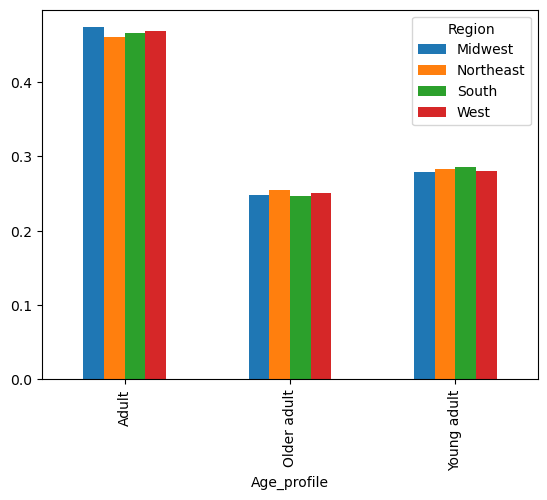

In [167]:
# Age_profile by region

age_region_bar = age_region_cross.plot.bar()

In [168]:
# Exporting age_region_bar

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

#### Income

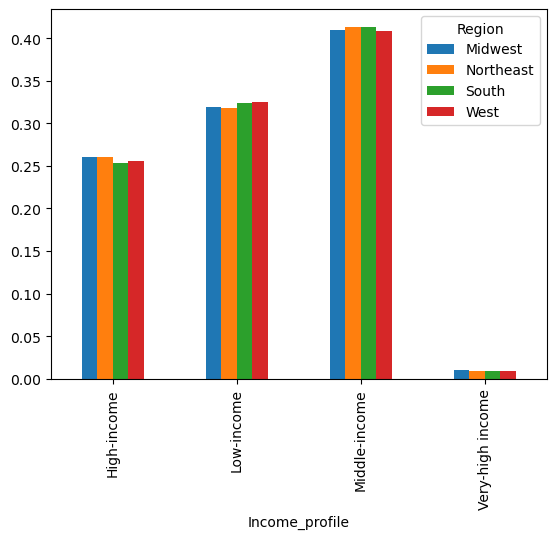

In [169]:
# Income_profile by region

income_region_bar = income_region_cross.plot.bar()

In [170]:
# Exporting income_region_bar

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

### Department

#### Vegans and non-vegans

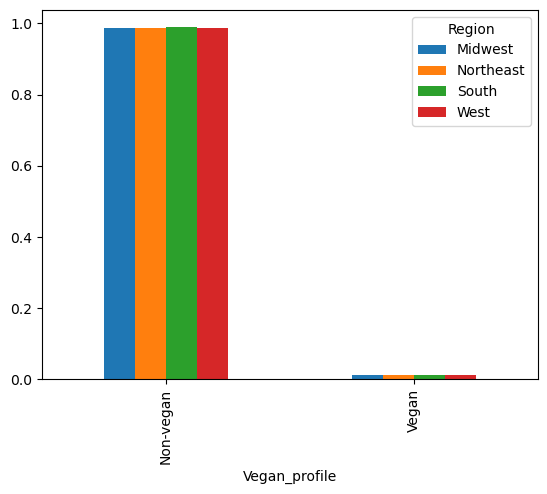

In [171]:
# Vegan_profile by region

vegan_region_bar = vegan_region_cross.plot.bar()

In [172]:
# Exporting vegan_region_bar

vegan_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_region_bar.png'))

#### Pet owners and no-pet owners

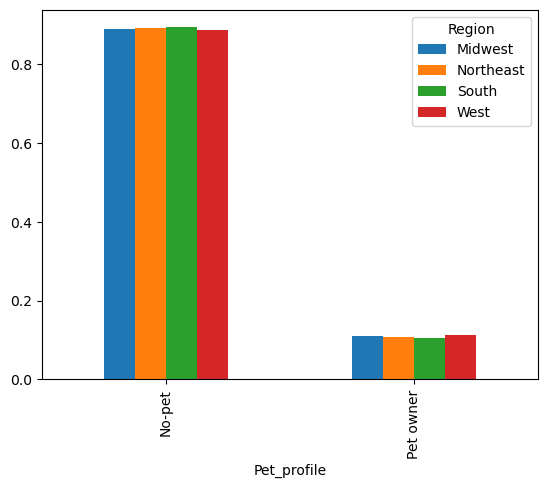

In [173]:
# Pet_profile by region

pet_region_bar = pet_region_cross.plot.bar()

In [174]:
# Exporting pet_region_bar

pet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_bar.png'))

#### Young parent (recently had a baby) and not young parent

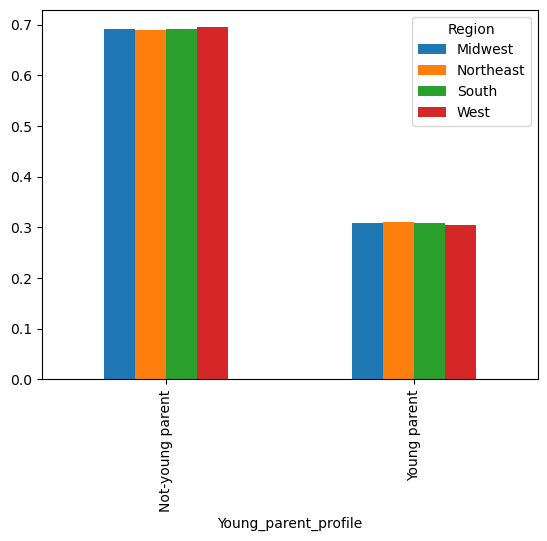

In [175]:
# Young_parent_profile by region

youngparent_region_bar = youngparent_region_cross.plot.bar()

In [176]:
# Exporting youngparent_region_bar

youngparent_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'youngparent_region_bar.png'))

#### Family status

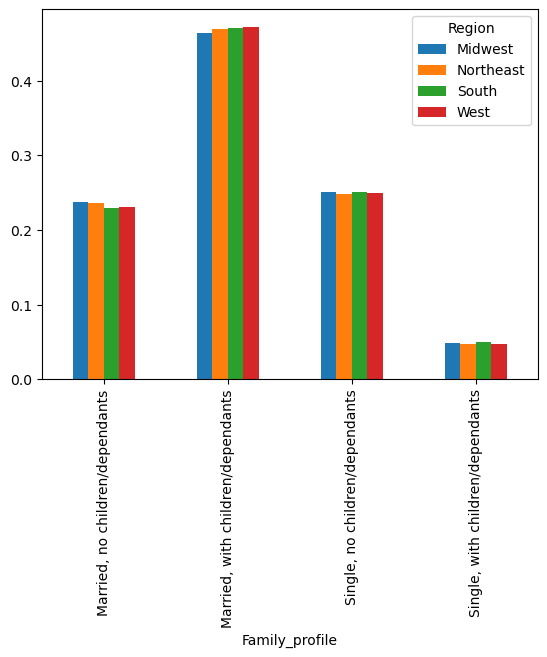

In [177]:
# Family_profile by region

family_region_bar = family_region_cross.plot.bar()

In [178]:
# Exporting family_region_bar

family_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_bar.png'))

#### Shoppers behavior by orders day of week and age group

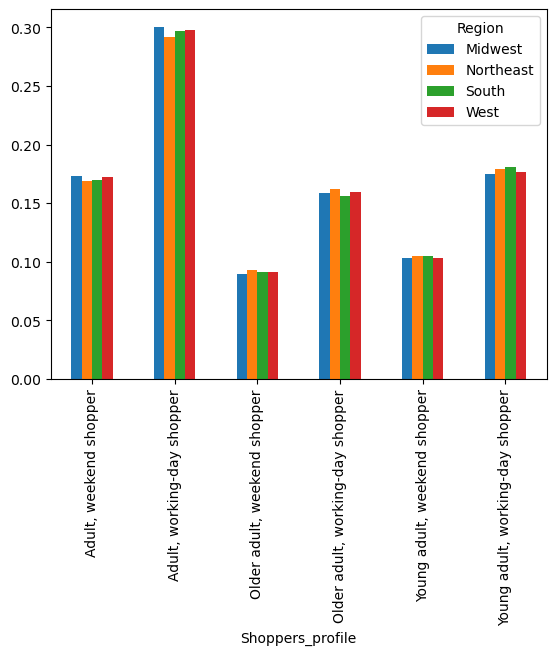

In [179]:
# Shoppers_profile by region

shoppers_dowage_region_bar = shoppers_dowage_region_cross.plot.bar()

In [180]:
# Exporting shoppers_dowage_region_bar

shoppers_dowage_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shoppers_dowage_region_bar.png'))

#### Shoppers behavior by orders day of week and family profile

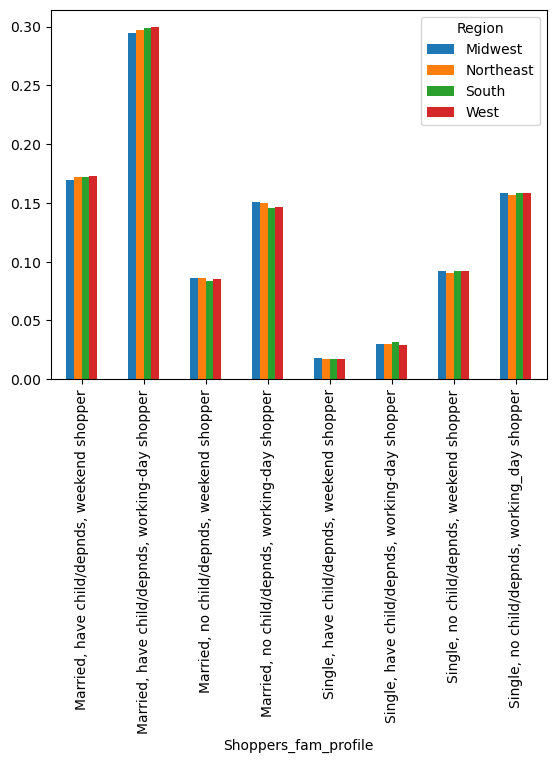

In [181]:
# Shoppers_fam_profile by region

shoppersfam_region_bar = shoppersfam_region_cross.plot.bar()

In [182]:
# Exporting shoppersfam_region_bar

shoppersfam_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shoppersfam_region_bar.png'))

### Visualizations for Customer profiles by Department

#### Age

In [183]:
# Creating a new crosstab so departments will be positioned on the x-axis

age_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Age_profile'])

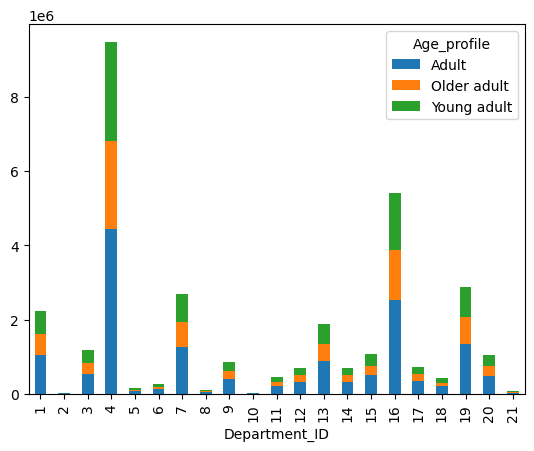

In [184]:
# Creating a stacked bar plot of the age_department_cross2

age_department_bar = age_department_cross2.plot.bar(stacked = True)

In [185]:
# Exporting age_department_bar

age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

#### Income

In [186]:
# Creating a new crosstab so departments will be positioned on the x-axis

income_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Income_profile'])

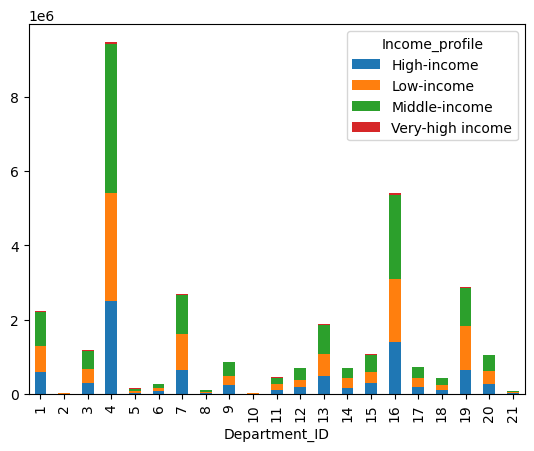

In [187]:
# Creating a stacked bar plot of the income_department_cross2

income_department_bar = income_department_cross2.plot.bar(stacked = True)

In [188]:
# Exporting income_department_bar

income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

### Department

#### Vegans and non-vegans

In [189]:
# Creating a new crosstab so departments will be positioned on the x-axis

vegan_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Vegan_profile'])

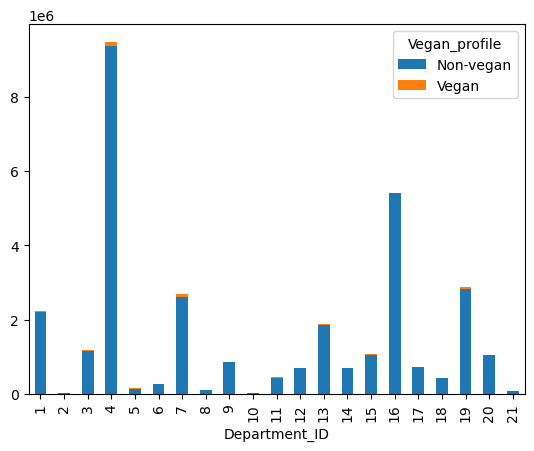

In [190]:
# Creating a stacked bar plot of the vegan_department_cross2

vegan_department_bar = vegan_department_cross2.plot.bar(stacked = True)

In [191]:
# Exporting vegan_department_bar

vegan_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_department_bar.png'))

#### Pet owners and no-pet owners

In [192]:
# Creating a new crosstab so departments will be positioned on the x-axis

pet_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Pet_profile'])

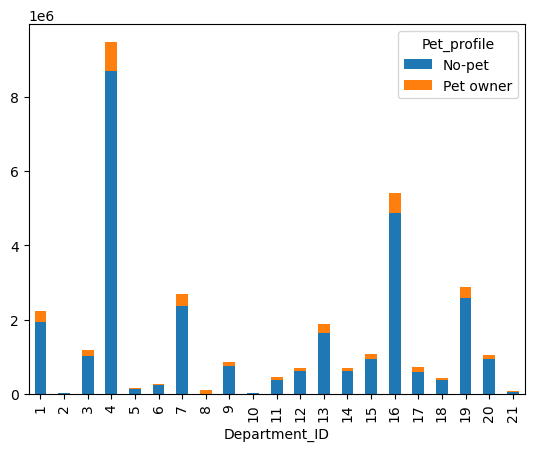

In [193]:
# Creating a stacked bar plot of the pet_department_cross2

pet_department_bar = pet_department_cross2.plot.bar(stacked = True)

In [194]:
# Exporting pet_department_bar

pet_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_department_bar.png'))

#### Young parent (recently had a baby) and not young parent

In [195]:
# Creating a new crosstab so departments will be positioned on the x-axis

youngparent_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Young_parent_profile'])

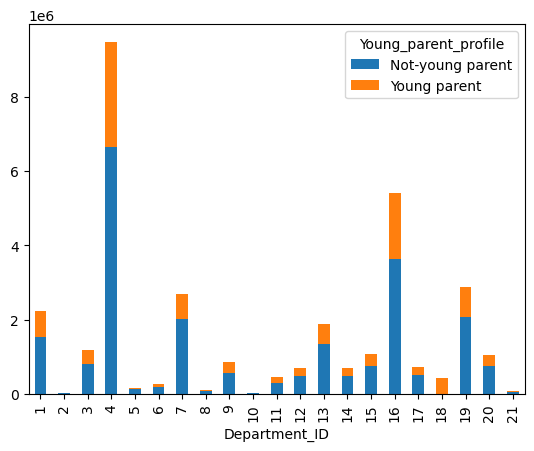

In [196]:
# Creating a stacked bar plot of the youngparent_department_cross2

youngparent_department_bar = youngparent_department_cross2.plot.bar(stacked = True)

In [197]:
# Exporting youngparent_department_bar

youngparent_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'youngparent_department_bar.png'))

#### Family status

In [198]:
# Creating a new crosstab so departments will be positioned on the x-axis

family_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Family_profile'])

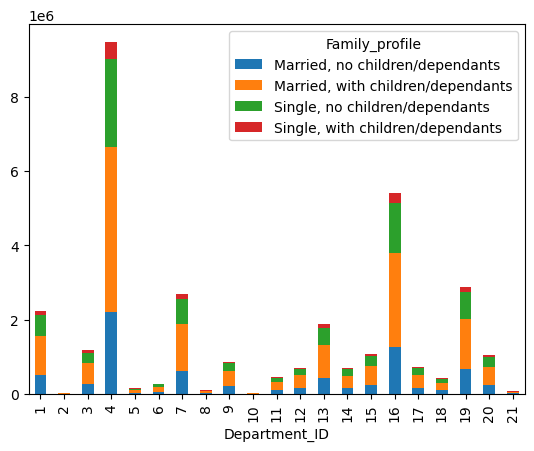

In [199]:
# Creating a stacked bar plot of the family_department_cross2

family_department_bar = family_department_cross2.plot.bar(stacked = True)

In [200]:
# Exporting family_department_bar

family_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_department_bar.png'))

#### Shoppers behavior by orders day of week and age group

In [201]:
# Creating a new crosstab so departments will be positioned on the x-axis

shoppersodow_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Shoppers_profile'])

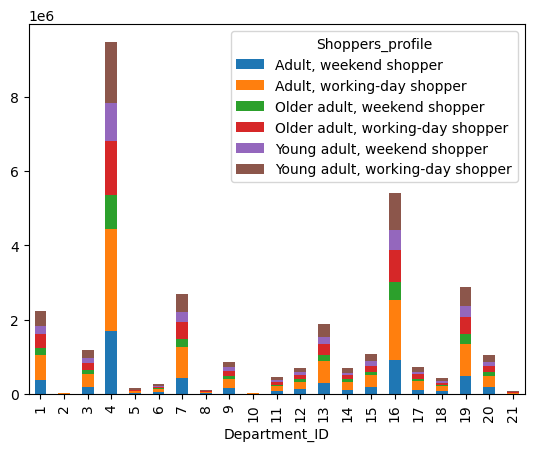

In [202]:
# Creating a stacked bar plot of the shoppersodow_department_cross2

shoppersodow_department_bar = shoppersodow_department_cross2.plot.bar(stacked = True)

In [203]:
# Exporting shoppersodow_department_bar

shoppersodow_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shoppersodow_department_bar.png'))

#### Shoppers behavior by orders day of week and family profile

In [204]:
# Creating a new crosstab so departments will be positioned on the x-axis

shoppersfam_department_cross2 = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Shoppers_fam_profile'])

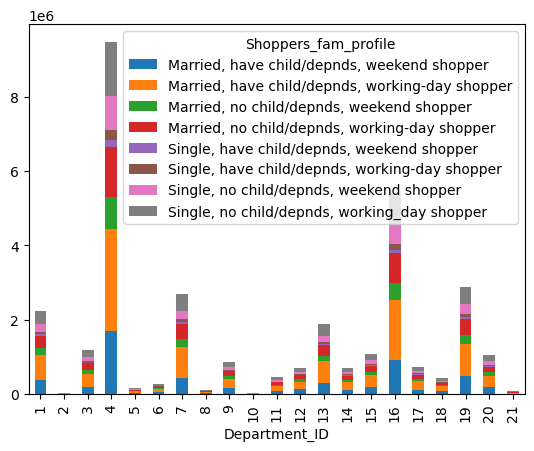

In [205]:
# Creating a stacked bar plot of the shoppersfam_department_cross2

shoppersfam_department_bar = shoppersfam_department_cross2.plot.bar(stacked = True)

In [206]:
# Exporting shoppersfam_department_bar

shoppersfam_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shoppersfam_department_bar.png'))

## 13.	Further analasys to answer other project questions

### 13.1. The differences in ordering habits based on a customer's loyalty status

In [207]:
# Creating a crosstab comparing "Department_ID" and "Loyalty_flag", and looking at percentages for better compatibility

department_loyalty_cross = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Loyalty_flag'], normalize = 'index')

In [208]:
# Check department_loyalty_cross

department_loyalty_cross

Loyalty_flag,Loyal customer,New customer,Regular customer
Department_ID,,,
1,0.272720,0.217154,0.510126
2,0.295252,0.212697,0.492050
3,0.324005,0.190804,0.485191
4,0.332027,0.183202,0.484772
5,0.251945,0.245276,0.502778
6,0.291154,0.212079,0.496767
7,0.318072,0.190791,0.491136
8,0.260643,0.210160,0.529197
9,0.279913,0.218464,0.501623


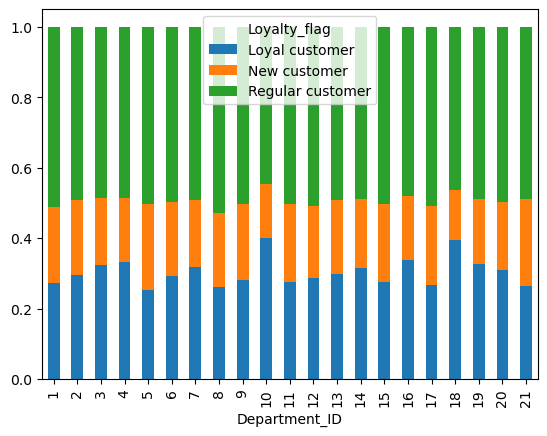

In [209]:
# Creating a stacked bar chart of the department_loyalty_cross

department_loyalty_bar = department_loyalty_cross.plot.bar(stacked = True)

In [210]:
# Exporting department_loyalty_bar

department_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_loyalty_bar.png'))

### 13.2. The differences in ordering habits based on a customer's region

In [211]:
# Creating a crosstab comparing "Department_ID" and "Region", and looking at percentages for better compatibility

department_region_cross = pd.crosstab(df_ords_prods_customs_all['Department_ID'], df_ords_prods_customs_all['Region'], normalize = 'index')

In [212]:
# Check department_region_cross

department_region_cross

Region,Midwest,Northeast,South,West
Department_ID,,,,
1,0.234522,0.174927,0.334669,0.255881
2,0.232013,0.181450,0.336502,0.250034
3,0.233591,0.177921,0.331632,0.256856
4,0.235032,0.175735,0.333416,0.255817
5,0.235439,0.172692,0.335884,0.255986
6,0.236714,0.174152,0.331072,0.258062
7,0.232718,0.179835,0.334412,0.253036
8,0.228775,0.190358,0.319999,0.260868
9,0.235129,0.175180,0.331681,0.258010


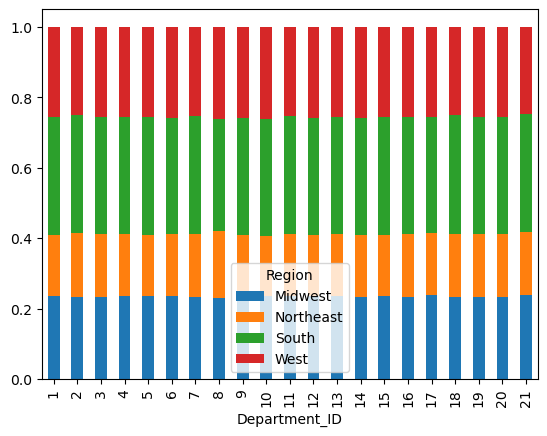

In [213]:
# Creating a stacked bar chart of the department_region_cross

department_region_bar = department_region_cross.plot.bar(stacked = True)

In [214]:
# Exporting department_region_bar

department_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_region_bar.png'))

### 13.3. Certain types of products that are more popular then others

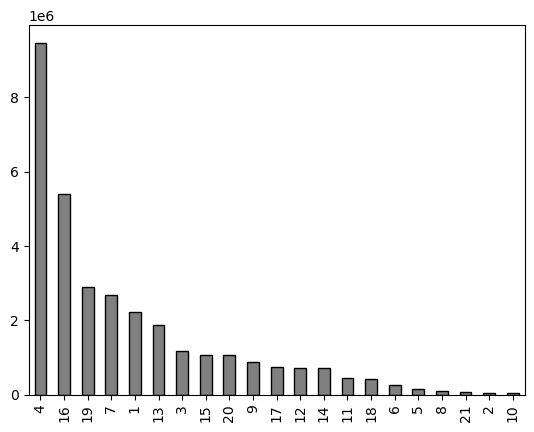

In [215]:
# Creating a bar chart for "Departmet_ID"

departmentid_bar = df_ords_prods_customs_all['Department_ID'].value_counts(dropna = False).plot.bar(color = ['grey'], ec = 'black')

In [216]:
# Exporting departmentid_bar

departmentid_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departmentid_bar.png'))

## 14.	Tidying up the script, exporting final data set, and saving the notebook

In [217]:
# Exporting final data set

df_ords_prods_customs_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_final.pkl'))